<div class="alert alert-block alert-info">
<b>Deadline:</b> January 15, 2025 (Wednesday) 23:00
</div>

# Exercise 2. Train a multilayer perceptron (MLP) with pytorch.

The goal of this exercise is to get familiar with the basics of PyTorch and train a multilayer perceptron (MLP) model.

If you are not familiar with PyTorch, please read the introductory material [here](https://pytorch.org/tutorials/beginner/basics/intro.html). We also recommend reading tutorials starting from [this page](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html).

In [15]:
skip_training = True  # Set this flag to True before validation and submission

In [2]:
# During evaluation, this cell sets skip_training to True
# skip_training = True

import tools, warnings
warnings.showwarning = tools.customwarn

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F

In [4]:
# Select device which you are going to use for training
#device = torch.device("cuda:0")
device = torch.device("cpu")

In [5]:
if skip_training:
    # The models are always evaluated on CPU
    device = torch.device("cpu")

# Data

We will train the MLP on a toy regression problem.

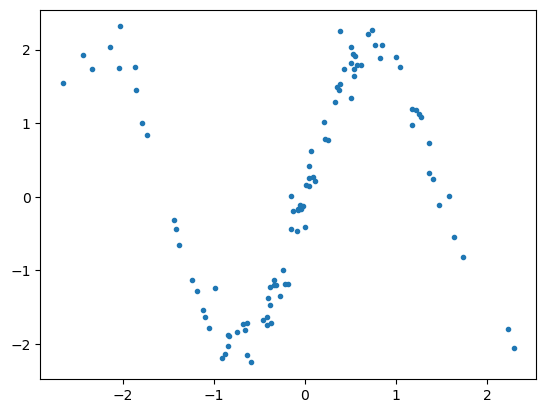

In [6]:
# Generate toy data
def get_data():
    np.random.seed(2)
    x = np.random.randn(100, 1)
    x = np.sort(x, axis=0)

    targets = 2 * np.sin(x * 2 * np.pi / 3)
    targets = targets + 0.2 * np.random.randn(*targets.shape)

    # Convert to PyTorch tensors
    x = torch.FloatTensor(x)
    targets = torch.FloatTensor(targets)

    return x, targets

x, targets = get_data()
# Plot the data
fig, ax = plt.subplots(1)
ax.plot(x, targets, '.')

# Multilayer perceptron (MLP) network with two hidden layers

We will create a simple multilayer perceptron (MLP) network. The model has
- input dimensionality 1
- one hidden layer with 10 units with Tanh nonlinearity
- one hidden layer with 11 units with Tanh nonlinearity
- linear output layer with output dimensionality 1 and no nonlinearity.

Hints:
* You may want to look at [this tutorial](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py) for reference.
* You can use [nn.Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear)
module to define the fully-connected layers of the MLP.
* Simple architectures are usually created using module [torch.nn.Sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html#torch.nn.Sequential). You do not have to use this module in this exercise.

In [7]:
class MLP(nn.Module):
    def __init__(self, n_inputs=1):
        # YOUR CODE HERE
        super(MLP, self).__init__()
        # Define the layers
        self.fc1 = nn.Linear(n_inputs, 10)  # First hidden layer with 10 units
        self.act1 = nn.Tanh()  # First Tanh activation
        self.fc2 = nn.Linear(10, 11)  # Second hidden layer with 11 units
        self.act2 = nn.Tanh()  # Second Tanh activation
        self.fc3 = nn.Linear(11, 1)  # Output layer with 1 unit

    def forward(self, x):
        """
        Args:
          x of shape (n_samples, n_inputs): Model inputs.

        Returns:
          y of shape (n_samples, 1): Model outputs.
        """
        # YOUR CODE HERE
        # Forward pass through the network
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)  # No activation on the output layer
        return x

In [8]:
# Let us create the network and make sure it can process a random input of the right shape
def test_MLP_shapes():
    n_inputs = 1
    n_samples = 10
    net = MLP()
    y = net(torch.randn(n_samples, n_inputs))
    assert y.shape == torch.Size([n_samples, 1]), f"Bad y.shape={y.shape}"
    print('Success')

test_MLP_shapes()

Success


## Train the MLP network

### Training loop

Your task is to implement the training loop.
You may find it useful to look at [this tutorial](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py).
Your should have the following steps:
* Set all gradient values to zeros.
* Calculate the output of the model for all training examples.
* Calculate the MSE loss (see [mse_loss](https://pytorch.org/docs/stable/generated/torch.nn.functional.mse_loss.html#torch.nn.functional.mse_loss)).
* Backpropagate the gradients: compute the gradients of the loss wrt to all the parameters of the model.
* Update the parameters of the model using the chosen optimizer.


Recommended hyperparameters:
* [Adam optimizer](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#torch.optim.Adam) with learning rate 0.01.
* You can process the data in the full-batch model (computing the gradients using all training data).
* Number of iterations (parameter updates): 200.

Notes:
* The loss for a well-trained model should be below 0.1. 

In [9]:
# Create the model
model = MLP()
model.to(device)

MLP(
  (fc1): Linear(in_features=1, out_features=10, bias=True)
  (act1): Tanh()
  (fc2): Linear(in_features=10, out_features=11, bias=True)
  (act2): Tanh()
  (fc3): Linear(in_features=11, out_features=1, bias=True)
)

In [10]:
# Implement the training loop here
if not skip_training:
    # YOUR CODE HERE
    # Set hyperparameters
    num_iterations = 200
    learning_rate = 0.01

    # Define the loss function and optimizer
    criterion = torch.nn.MSELoss()  # Mean Squared Error Loss
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # Move data to the correct device
    x, targets = get_data()
    x, targets = x.to(device), targets.to(device)

    # Training loop
    for iteration in range(num_iterations):
        # Zero the gradient buffers
        optimizer.zero_grad()

        # Forward pass: compute model output
        predictions = model(x)

        # Compute the loss
        loss = criterion(predictions, targets)

        # Backward pass: compute gradients
        loss.backward()

        # Update model parameters
        optimizer.step()

        # Print the loss every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}/{num_iterations}, Loss: {loss.item()}")

else:
    print("Training skipped.")

Iteration 20/200, Loss: 1.631401538848877
Iteration 40/200, Loss: 1.1039925813674927
Iteration 60/200, Loss: 0.3390193283557892
Iteration 80/200, Loss: 0.1003372073173523
Iteration 100/200, Loss: 0.06497799605131149
Iteration 120/200, Loss: 0.0587884858250618
Iteration 140/200, Loss: 0.05683961883187294
Iteration 160/200, Loss: 0.05574023723602295
Iteration 180/200, Loss: 0.05486860126256943
Iteration 200/200, Loss: 0.054118383675813675


In [11]:
# Save the model to disk (the pth-files will be submitted automatically together with your notebook)
# Set confirm=False if you do not want to be asked for confirmation before saving.
if not skip_training:
    tools.save_model(model, '2_mlp.pth', confirm=True)

Do you want to save the model (type yes to confirm)?  yes


Model saved to 2_mlp.pth.


In [12]:
if skip_training:
    model = MLP()
    tools.load_model(model, '2_mlp.pth', device)

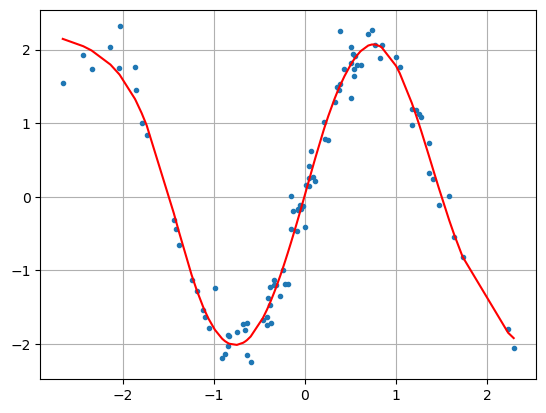

In [13]:
# Plot the trained MLP
with torch.no_grad():
    fig, ax = plt.subplots(1)
    ax.plot(x, targets, '.')
    y = model(x)
    ax.plot(x, y.numpy(), 'r-')
    ax.grid(True)

In [ ]:
# This cell tests MLP

In [ ]:
# This cell tests MLP

In [ ]:
# This cell is used for grading

<div class="alert alert-block alert-info">
<b>Conclusions</b>
</div>

Now you have trained an MLP network using PyTorch. You can see how PyTorch makes it easier to implement and train deep learning models.